*Barbara Noémi Szabó\
2024.02.02.*
# Neural Netwrok for classification of 2D points (supervised learning). 

## Problem Description
### Input data
2D points: $x,y \in [-1, 1]$

### Labels
* 1 - point is inside the unit circle centered at the origin
* 0 - point is outside the circle

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import sleep
from IPython import display
import pylab as pl


## Make training data

In [3]:
def is_circle(points):
    return (points[:, 0]**2+points[:, 1]**2)**0.5 <= 1

def is_circle_line(points, epsilon):
    return (1 - epsilon <= (points[:, 0]**2+points[:, 1]**2)**0.5) & ((points[:, 0]**2+points[:, 1]**2)**0.5 <= 1 + epsilon)

In [34]:
N = 20**2

nodes = np.linspace(-1, 1, int(N**0.5))
points = np.array([(i,j, 0) for i in nodes for j in nodes])

# Uncomment for random generated points
points = np.around((np.random.uniform(low=-1.0, high=1.0, size=(N, 3))), 3)

points[:, 2] = is_circle(points)

np.random.shuffle(points)

X = points[:, :2]
y = points[:, 2]

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Build the network

### Training

In [36]:
epochs = 75
batch_size = 32

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/75
8/8 [==============================] - 0s 13ms/step - loss: 0.6865 - accuracy: 0.5917 - val_loss: 0.6562 - val_accuracy: 0.8000
Epoch 2/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.7583 - val_loss: 0.6261 - val_accuracy: 0.8000
Epoch 3/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7583 - val_loss: 0.6041 - val_accuracy: 0.8000
Epoch 4/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.7583 - val_loss: 0.5873 - val_accuracy: 0.8000
Epoch 5/75
8/8 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7583 - val_loss: 0.5748 - val_accuracy: 0.8000
Epoch 6/75
8/8 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.7583 - val_loss: 0.5629 - val_accuracy: 0.8000
Epoch 7/75
8/8 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.7583 - val_loss: 0.5529 - val_accuracy: 0.8000
Epoch 8/75
8/8 [=================

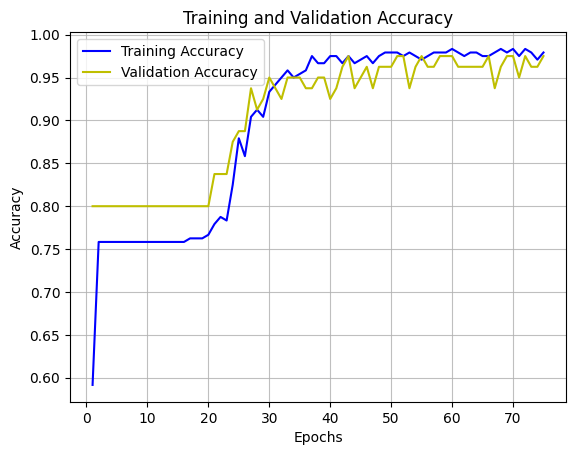

In [37]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epoch_list = list(range(1, epochs + 1))

plt.plot(epoch_list, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epoch_list, val_accuracy, 'y-', label='Validation Accuracy')
plt.grid(alpha=0.8)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9625
Test accuracy: 0.9624999761581421


# Visualize results

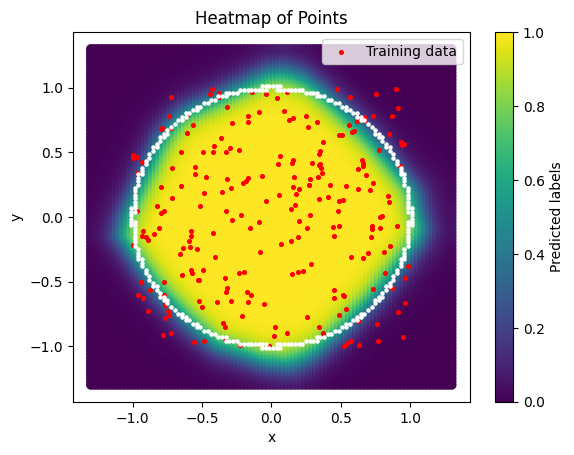

In [40]:
nodes = np.linspace(-1.3, 1.3, 100)
eps = 0.015

data = np.array([(i,j) for i in nodes for j in nodes])
circle = data[is_circle_line(data, eps)]

res = model.predict(data, verbose=0)

plt.scatter(data[:, 0], data[:, 1], c=res, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c="r", s=7, label="Training data")
plt.scatter(circle[:, 0], circle[:, 1], c="white", s=5)

plt.colorbar(label='Predicted labels')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of Points')
plt.legend()
plt.show()

# Predict per ephoc

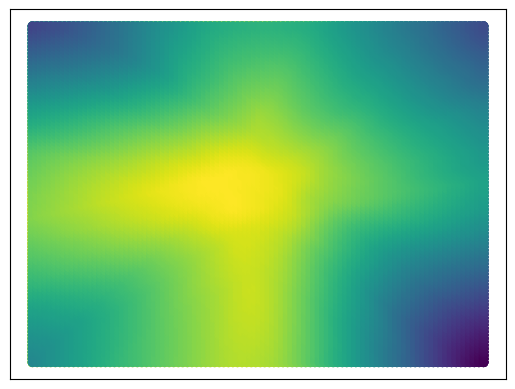

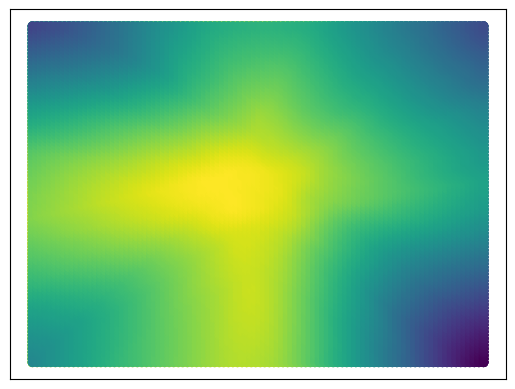

In [18]:
%matplotlib inline
ephocs = 10
batch_size = 32

nodes = np.linspace(-1.3, 1.3, 100)
data = np.array([(i,j) for i in nodes for j in nodes])


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

predictions_per_ephoc = []
for ephoc in range(ephocs):
    # Perform one epoch of training
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0)
    
    # Get predictions on the validation set after each epoch
    predictions = model.predict(data, verbose=0)
    predictions_per_ephoc.append(predictions)
    
print("Starting plot...")
for prediction in predictions_per_ephoc:
    pl.scatter(data[:, 0], data[:, 1], c=prediction, cmap='viridis')
    pl.xticks([])
    pl.yticks([])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    # sleep(0.1)
